<a href="https://colab.research.google.com/github/MaggieHDez/AIProject/blob/main/ProyectoProgADAP_255879FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: Análisis y Clasificación del Estado Metabólico Mediante Indicadores Fisiológicos
## Grupo: B
## Autor: Hernández Delgadillo, Margarita Cristina
## Matrícula: 255879
## Fecha: 05/21/2025

In [2]:
# Conexión a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Introducción**


## - Descripción del problema: ¿Qué queremos analizar o predecir?
En este estudio partimos de variables clave —Indice de Masa Corporal (BMI), glucosa en ayunas y niveles de insulina— con el fin de:
  - Explorar su distribución en la población: detectar posibles valores atípicos (outliers) y ver cómo varían los datos según género y grupos etarios.
  - Entender las relaciones entre variables: medir correlaciones y patrones entre BMI, glucosa e insulina.
  - Predecir el estado metabólico: clasificar a cada individuo en “no diabético”, “pre-diabético” o “diabético” a partir de estas variables.

## - Objetivo del análisis: ¿Qué impacto tendrá este análisis?
  - Clasificar a cada persona como “sin diabetes”, “pre-diabético” o “diabético” usando su BMI, azúcar en ayunas e insulina.
  - Encontrar qué de estas medidas y en qué niveles son más importantes para definir cada estado.
  - Ayudar a hacer revisiones tempranas y a diseñar planes de salud personalizados.

## - Fuente de datos: ¿De dónde provienen los datos?
  - Los datos principales provienen de un archivo CSV con registros de personas que incluyen su BMI, niveles de glucosa en ayunas y niveles de insulina.
    ```
    Willian Oliveira Gibin & Pooria Mostafapoor. (2025).
    Age National [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/10587919
    ```
  - Además, se utilizó el conjunto de datos de la CDC para calcular el IMC de niños de 2 a 19 años y así clasificar correctamente los rangos de BMI pediátricos.
    ```
    CDC. Selected percentiles and z-scores with LMS and sigma parameters [CSV].
    Centros para el Control y la Prevención de Enfermedades.
    https://www.cdc.gov/growthcharts/extended-bmi-data-files.htm
    ```

# **2. Captura y Carga de Datos**


## - Explicación de la fuente de datos: ¿Cuáles son las fuentes de datos?, ¿Qué formato tienen los datos (CSV, SQL, API, etc.)?, ¿Cuántas observaciones y variables contiene el dataset?
  - **Fuentes y formato**
    - **Age National**
      - **Autores:** Willian Oliveira Gibin & Pooria Mostafapoor (2025).
      - **Formato:** CSV con 2 278 registros y 11 columnas (6 numéricas enteras, 2 de texto, 2 decimales y 1 variable especial).
      - **DOI:** https://doi.org/10.34740/KAGGLE/DSV/10587919
      - Contiene información demográfica (ID, edad, género) y mediciones fisiológicas (BMI, glucosa en ayunas, insulina, etc.).
    - **Datos de la CDC**
      - **Fuente:** Centros para el Control y la Prevención de Enfermedades.
      - **Formato:** CSV con 438 filas y 35 columnas.
      - **URL:** https://www.cdc.gov/growthcharts/extended-bmi-data-files.htm
      - Proporciona percentiles y z-scores oficiales de BMI para niños de 2 a 19 años, esenciales para definir rangos pediátricos (bajo peso, saludable, sobrepeso, obesidad).

## - Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (bibiotecas, etc.)
### - Proceso de carga
Para leer y explorar los archivos utilizamos `pandas`, junto con `matplotlib` y `seaborn` para la visualización posterior:

  1. **Objetivo de cada biblioteca**
    - `pandas`: para la carga, limpieza y manejo de los DataFrames.
    - `matplotlib/seaborn`: para la creación de los histogramas, boxplots y gráficos de dispersión para entender la distribución de los datos y las relaciones entre variables.
  2. **Verificación de integridad**
    - `df.shape()`: con este comando confirmamos el tamaño de cada dataset.
    - `df.head()`: con éste comprobamos qué columnas clave (BMI, glucosa, insulina, edad, género) están presentes y formateadas de manera correcta.

Estos pasos garantizan que nuestros datos se cargan sin errores y nos permiten preparar las transformaciones y el análisis exploratorio de manera estructurada.

In [3]:
# Librería para carga de datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, anderson, cramervonmises, spearmanr, kruskal

# Rutas de archivos
paths = {
    'age': '/content/drive/MyDrive/ClassFiles/proyecto/Age National  body blood new.csv',
    'cdc': '/content/drive/MyDrive/ClassFiles/proyecto/bmi-age-2022.csv'
}

# Carga de datos
age_df = pd.read_csv(paths['age'])
cdc_df = pd.read_csv(paths['cdc'])

# Verificación de los datasets
for name, df in [('age', age_df), ('cdc', cdc_df)]:
  num_observaciones, num_variables = df.shape
  print(f"Dataset {name}:\n")
  print("Número de observaciones:", num_observaciones)
  print("Número de variables:", num_variables)
  print('\nPrimeras 5 columnas\n', df.head())

Dataset age:

Número de observaciones: 2278
Número de variables: 11

Primeras 5 columnas
       ID Age_group  Age  Gender  PAQ605 Body Mass Index  \
0  73680  children   12       1       2              18   
1  74130  children   12       1       2            14,5   
2  74614  children   12       2       2            21,4   
3  74658  children   12       2       2            20,3   
4  74691  children   12       2       2            15,7   

   Blood Glucose after fasting  Diabetic or not  Respondent's Oral  \
0                           96                2                 83   
1                           85                2                 91   
2                           95                2                111   
3                           98                2                107   
4                           91                2                 94   

  Blood Insulin Levels percentage Body/Blood  
0                 10,8               166,67%  
1                10,86               133

#**3.Transformación y Preprocesamiento - Data Wrangling**


## - Identificación de Tipos de Datos
Con df.info() confirmamos que tenemos 2,278 filas y 11 columnas. Estas columnas son:

Columna | Tipo | Descripción
---------|------|------------
ID | int64 | Identificador único  
Age_group | object |	Grupo etario
Age | int64	| Edad
Gender | int64 | 1 = Masculino, 2 = Femenino
PAQ605 | int64 | Actividad laboral vigorosa (1 = Sí, 2 = No, 7 = Negó a responder, 9 = No sabe)
Body Mass Index (BMI) |	object | Índice de masa corporal
Blood Glucose after fasting |	int64 |	Glucosa en ayunas
Diabetic or not |	int64 |	1 = Diabético, 2 = No, 3 = Prediabético
Respondent's Oral |	int64 |	Glucosa oral
Blood Insulin Levels | object |	Niveles de insulina
percentage Body/Blood |	object | Porcentaje entre cuerpo e insulina en la sangre

## - Cantidad de Valores nulos
Se ejecutó `df.isnull().sum()` para confirmar que efectivamente no existen valores faltantes en ninguna columna. Esto nos da la confianza de que el dataset está completo y listo para el análisis. También con df.duplicated().sum() eliminamos duplicados si los hay.
##- Explicación sobre cada una de las problemáticas encontradas, las soluciones y el código
1. **Registros duplicados**
  - **Verificación:** Comprobar número de filas duplicadas.
  - **Resultado:** `0` duplicados (no se requiere eliminación).
2. **Detección de outliers**
  - **Problema:** Valores atípicos en variables numéricas (BMI, glucosa e insulina).
  - **Solución:** Visualizar con boxplots y decidir tratamiento.
3. **Columnas en formato `object`**
  - **Problema:** `Body Mass Index`, `Blood Insulin Levels` y `percentage Body/Blood` contienen comas para decimales (y `%`).
  - **Solución:** Reemplazar comas por puntos, eliminar `%` si lo hubiera, y convertir a `float`.
4. **Variables numéricas-categóricas**
  - **Problema:** `Gender`, `PAQ605`, `Diabetic or not` están como enteros pero representan categorías.
  - **Solución:** Convertirlas a tipo `category` y renombrar las etiquetas para mayor claridad.
5. **Clasificación de BMI pediátrico y adultos**
  - **Problema:** Los niños (2-19 años) requieren percentiles diferentes a los adultos, que usan rangos fijos de BMI.
  - **Solución:**
    1. Calcular `Age_in_months` y fusionar con los datos de CDC.
    2. Aplicar función que evalúa percentiles para niños o rangos estándar para adultos.
6. **Normalización de nombres de columnas**
  - **Problema:** Los nombres de columna con espacios y mayúsculas complican el código.
  - **Solución:** Pasar todo a `snake_case` (minúsculas y guiones bajos).
7. **Verificación final**
   - **¿Qué comprobamos?:** Que no queden o hayan `NaN` en las variables críticas (`body_mass_index`, `blood_insulin_levels`, `blood_glucose_after_fasting`), y opcionalmente resetear el índice con `df.reset_index(drop=True)` para dejar el DataFrame listo para el siguiente paso.

Información del dataset Age National:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           2278 non-null   int64 
 1   Age_group                    2278 non-null   object
 2   Age                          2278 non-null   int64 
 3   Gender                       2278 non-null   int64 
 4   PAQ605                       2278 non-null   int64 
 5   Body Mass Index              2278 non-null   object
 6   Blood Glucose after fasting  2278 non-null   int64 
 7   Diabetic or not              2278 non-null   int64 
 8   Respondent's Oral            2278 non-null   int64 
 9   Blood Insulin Levels         2278 non-null   object
 10  percentage Body/Blood        2278 non-null   object
dtypes: int64(7), object(4)
memory usage: 195.9+ KB
None

Estadísticas descriptivas:
                  ID        

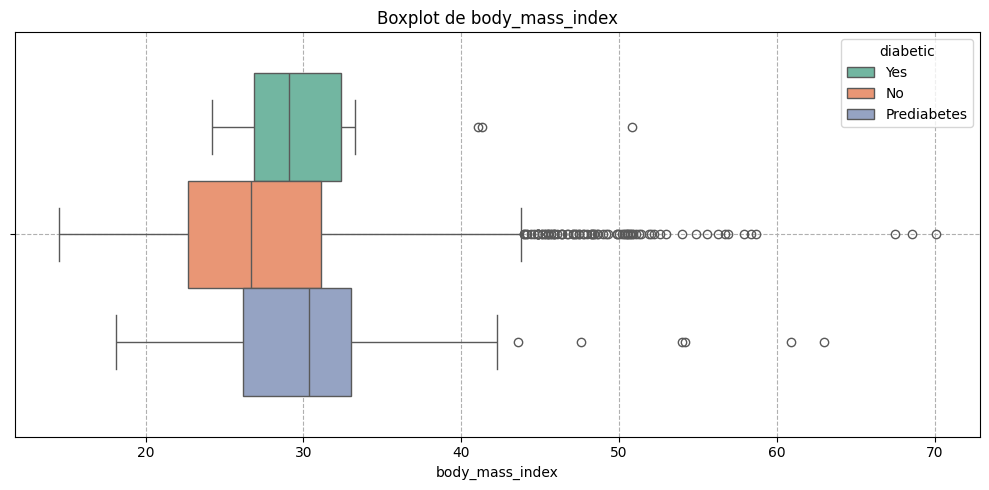

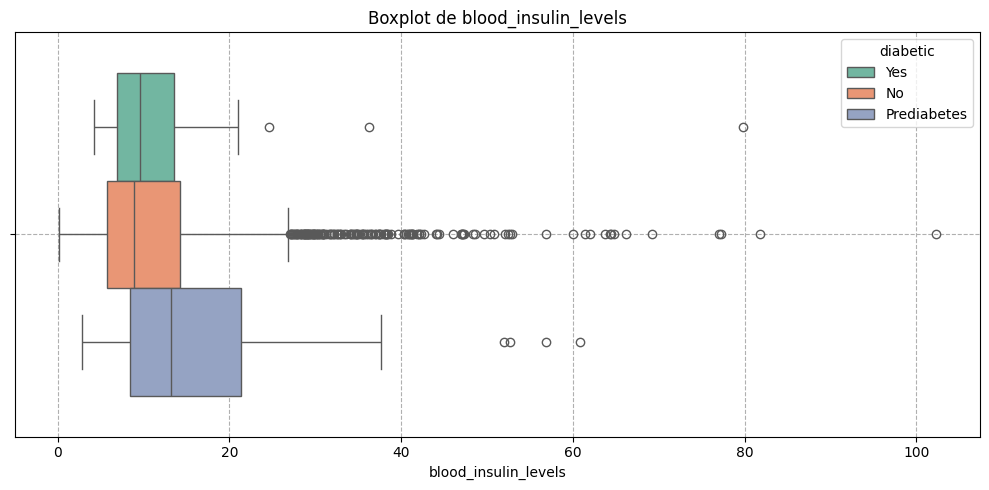

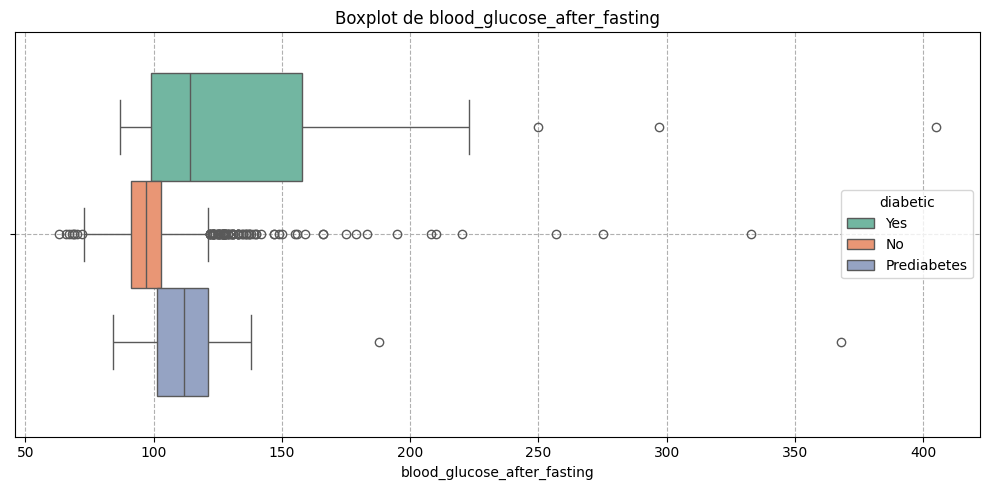

Información del dataset Age National final:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age_group                    2278 non-null   category
 1   gender                       2278 non-null   category
 2   body_mass_index              2278 non-null   float64 
 3   blood_glucose_after_fasting  2278 non-null   int64   
 4   diabetic_or_not              2278 non-null   int64   
 5   blood_insulin_levels         2278 non-null   float64 
 6   diabetic                     2278 non-null   category
 7   bmi_category                 2278 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 80.8 KB
None

Estadísticas descriptivas finales:
        body_mass_index  blood_glucose_after_fasting  diabetic_or_not  blood_insulin_levels
count      2278.000000                  2278.000000      2278.

In [4]:
# Información del dataset
print("Información del dataset Age National:\n")
print(age_df.info())

# Obtener estadísticas descriptivas básicas para ver distribución y rangos
print("\nEstadísticas descriptivas:\n", age_df.describe().to_string())

# Verificar datos faltantes en cada columna
faltantes = age_df.isnull().sum()
print("\nDatos faltantes por columna:\n", faltantes)

# Registros duplicados
num_duplicados = age_df.duplicated().sum()
print(f"Duplicados encontrados: {num_duplicados}")

# Conversión de tipos de datos, Body Mass Index, Blood Insulin Levels
age_df['Body Mass Index'] = pd.to_numeric(age_df['Body Mass Index'].str.replace(',', '.'), errors='coerce')
age_df['Blood Insulin Levels'] = pd.to_numeric(age_df['Blood Insulin Levels'].str.replace(',', '.'), errors='coerce')

# Transformación a variables categóricas
age_df['Diabetic'] = age_df['Diabetic or not'].astype('category')
age_df['Age_group'] = age_df['Age_group'].astype('category')

# Renombrando categorías
age_df['Diabetic'] = age_df['Diabetic'].cat.rename_categories({1: 'Yes', 2: 'No', 3: 'Prediabetes'})
age_df['Age_group'] = age_df['Age_group'].cat.rename_categories({'children': 'Children'})

# Nueva variable de Edad en meses
age_df['Age_in_months'] = age_df['Age'] * 12 + 0.5 # Se agrega 0.5 para igualarlo al dataset de la CDC

# DataFrame con solo las columnas necesarias para clasificación
cdc_df = cdc_df[['sex', 'agemos', 'P5', 'P85', 'P95', 'pct120ofP95']]

# Incorporación del DataSet y las columnas del DataSet de la CDC en uno
df_final = pd.merge(age_df, cdc_df, left_on=['Age_in_months', 'Gender'], right_on=['agemos', 'sex'], how='left')

# Función para clasificar el BMI usando los puntos de referancia del CDC
def categorize_bmi_cdc(row):
  bmi = row['Body Mass Index']
  age_group = row['Age_group']
  if age_group == 'Children':
  # Se verifica que existan los datos CDC necesarios
    if pd.isnull(row['P5']) or pd.isnull(row['P85']) or pd.isnull(row['P95']) or pd.isnull(row['pct120ofP95']):
      return "Sin datos CDC"
    if bmi < row['P5']:
      return "Underweight"
    elif bmi < row['P85']:
      return "Healthy"
    elif bmi < row['P95']:
      return "Overweight"
    elif bmi < row['pct120ofP95']:
      return "Obesity"
    else:
      return "Severe Obesity"
  else:
    if bmi < 18.5:
      return "Underweight"
    elif bmi >=18.5 and bmi < 24.9:
      return "Healthy"
    elif bmi >=25 and bmi < 29.9:
      return "Overweight"
    elif bmi >=30 and bmi < 39.9:
      return "Obesity"
    else:
      return "Severe Obesity"

# Aplicar la función para crear una nueva columna de clasificación del BMI según la CDC
df_final['BMI_category'] = df_final.apply(categorize_bmi_cdc, axis=1)
df_final['BMI_category'] = df_final['BMI_category'].astype('category')

# Transformamos despues de hacer la fusion de columnas y clasificación del BMI
df_final['Gender'] = df_final['Gender'].astype('category')
df_final['Gender'] = df_final['Gender'].cat.rename_categories({1: 'Male', 2: 'Female'})

# Normalizacion de columnas
print("\nColumnas originales:", df_final.columns.tolist())
df_final.columns = (
    df_final.columns
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("[^0-9a-z_]", "", regex=True)
)
print("\nColumnas normalizadas:", df_final.columns.tolist())

# Eliminamos filas innecesarias
df_final = df_final.drop(columns=['id', 'age', 'paq605', "respondents_oral", 'percentage_bodyblood', 'age_in_months', 'sex', 'agemos', 'p5', 'p85', 'p95', 'pct120ofp95'])

# Verificación final de nulos e índice limpio
print('\nNulos:\n', df_final[['body_mass_index','blood_insulin_levels', 'blood_glucose_after_fasting']].isnull().sum())

# Imputación
df_final[['body_mass_index',
    'blood_insulin_levels',
    'blood_glucose_after_fasting']] = df_final[['body_mass_index',
                                          'blood_insulin_levels',
                                          'blood_glucose_after_fasting']].fillna(df_final[['body_mass_index',
                                                                                     'blood_insulin_levels',
                                                                                     'blood_glucose_after_fasting']].median())

# Reseteo
df_final = df_final.reset_index(drop=True)

# Gráficos
columnas_numericas = ['body_mass_index','blood_insulin_levels', 'blood_glucose_after_fasting']

# Boxplots
for col in columnas_numericas:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=df_final[col], palette='Set2', hue=df_final['diabetic'])
  plt.title(f'Boxplot de {col}')
  plt.grid(True, linestyle='--')
  plt.tight_layout()
  plt.show()

# Información del dataset después
print("Información del dataset Age National final:\n")
print(df_final.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas finales:\n", df_final.describe().to_string())


In [5]:
# Función para eliminar outliers, en la sección 5
def remove_outliers_mad(df, col, thresh=3.5):
  # Devuelve un DataFrame sin outliers en la columna `col`,
  # usando el robust z-score basado en MAD.
  s = df[col]
  med = s.median()
  mad = (s - med).abs().median() or 1.0
  mask = ((s - med).abs() / mad) <= thresh
  df_clean = df.loc[mask].copy()

  # Asumiendo que df_clean no tiene outliers
  fig, ax = plt.subplots(1,2,figsize=(10,4))
  sns.histplot(df[col], ax=ax[0], kde=True)
  ax[0].set_title('Con outliers')
  sns.histplot(df_clean[col], ax=ax[1], kde=True, color='orange')
  ax[1].set_title('Sin outliers')
  plt.suptitle(f'Comparación de distribuciones de {col}')
  plt.tight_layout()
  plt.show()

  plot_distribution(df_clean, col) # Para datos sin outliers

  # Kruskal–Wallis  - los datos no son normales
  groups = [g[col].values for _, g in df.groupby('diabetic', observed=True)]
  stat, p = kruskal(*groups)
  print(f"\nKruskal–Wallis (BMI): H={stat:.2f}, p={p}\n")
  if p < 0.05:
    print("  → Cambia de forma significativa según el estado diabético.\n")
  else:
    print("  → No se detectan diferencias significativas.\n")

  return df_clean

def plot_distribution(data, column_name):
    # data_clean = data.dropna()  # Eliminar valores nulos, nuevamente para verificar
    plt.figure(figsize=(12, 5))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.tight_layout()
    plt.show()

# **4. Análisis Descriptivo de Datos**


## - Preguntas a responder con el AD
  - ¿Cómo se distribuyen las variables continuas?
    - BMI, glucosa en ayunas e insulina: utilizar la media, mediana, moda, dispersión, kurtosis y sesgo.
  - ¿Qué proporción ocupa cada categoría en el target?
    - El procentaje de no diabéticos, prediabéticos y diabéticos.
  - ¿Existen diferencias según género o grupo de edad?
    - Hay que comparar estadísticas de BMI/glucosa/insulina entre hombres y mujeres, y entre niños/adultos.
  - ¿Cómo se relacionan las variables entre sí?
    - Encontrar la correlación BMI-glucosa, insulina-glucosa, BMI-insulina.

## - Explicación de Estadísticas Básicas Aplicadas, Visualización de Datos con Gráficos, y Resumen de las respuestas
  - **Estadísticas Básicas Aplicadas**
    - Univariante: Realizamos nuevamente df.describe() de las variables `bmi`, `blood_glucose_after_fasting`, `blood_insulin_levels` y analizamos los percentiles clave (p25, p50, p75).
    - Balanceo de clases: Utilizamos `.value_counts()` o `.value_counts(normalize=True)` para el balanceo de clases.
    - Correlaciones: Realizar la correlación de variables y el mapa de calor.
  - **Visualización de Datos**
    - Histogramas: Vemos la distribución de cada variable continua con KDE.
    - Boxplots: Valores atípicos y rangos por género y grupo etario.
    - Gráficos de barras: Vemos la proporción de clases en `diabetic`, en `gender` y en `age_group`.
  - **Resumen de las respuestas**
    - Observando los resultados, la mayoría de las personas tienen un BMI cercano a 27, un nivel de glucosa en ayunas alrededor de 100 y una insulina cerca de 12. Sin embargo, hay algunos casos en los que se disparan muy alto (por ejemplo, BMI de 70 o glucosa de 400), de modo que la distribución va hacia valores extremos. Esto puede significar que las personas no han tenido un cuidado bueno de su glucosa o peso y por eso tienen valores muy altos.
    - Quiénes tienen y quiénes no tienen diabetes?\
      Del 100%(2,278) de las personas:
        - 96.53% o 2,199 no son diabéticas.
        - 2.55% o 58 tienen prediabetes, y
        - 0.92% o 21 son diabéticas
    - ¿Diferencias por género o edad?
      - Entre hombres y mujeres, se encuentran con casi el mismo procentaje entre diabetes y prediabetes, mientras que sin diabetes tienen el mismo porcentaje, como se puede observar en la tabla(los valores están en decimal)
      - Entre los grupos etarios, los adultos mayores muestran un procentaje ligeramente elevado (5%) en prediabetes que niños y adultos y no hay diabetes en los niños.
    - ¿Se relacionan entre sí BMI, glucosa e insulina?
      - El BMI y la insulina la correlación es moderada y mientras aumente el BMI, estará aumentando la insulina.
      - Entre BMI y glucosa o glucosa e insulina no hay una correlación fuerte así que no tienen mucho efecto entre sí.

<center>

**Crosstab: Género vs Estado diabético**

diabetic/gender |  Yes  |  No | Prediabetes
----------------|-------|-----|-------------
Male   | 0.01 | 0.96 | 0.03
Female | 0.01 | 0.97 | 0.02

**Crosstab: Grupo etario vs Estado diabético**

diabetic/age_group | Yes | No | Prediabetes
---------|-----|----|------------                        
Adult | 0.01 | 0.97 | 0.02
Senior | 0.02 | 0.93 | 0.05
Children | 0.00 | 0.99 | 0.01

</center>

In [6]:
def prueba_normalidad(df, col):
  # Prueba de Shapiro–Wilk
  stat_sw, p_sw = shapiro(df[var].dropna())
  print(f"\nShapiro–Wilk: p-value={p_sw}")
  if p_sw > 0.05:
    print("  -> Shapiro–Wilk: no se rechaza normalidad (p > 0.05).")
  else:
    print("  -> Shapiro–Wilk: se rechaza normalidad (p ≤ 0.05).")

  # Prueba de Anderson–Darling
  anderson_test = anderson(df[var].dropna(), dist='norm')
  print(f"Anderson–Darling: Estadístico={anderson_test.statistic}")
  for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    if anderson_test.statistic < cv:
      print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
    else:
      print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

  # Prueba de Cramér–von Mises
  cvm = cramervonmises(df[var].dropna(), 'norm')
  print(f"Cramér–von Mises: Estadístico={cvm.statistic}, p-value={cvm.pvalue}")
  if cvm.pvalue > 0.05:
    print("  -> Cramér–von Mises: no se rechaza normalidad (p > 0.05).")
  else:
    print("  -> Cramér–von Mises: se rechaza normalidad (p ≤ 0.05).")

  print("\n" + "-"*60 + "\n") # formula para crear la línea separadora

def plot_distribution(df, col):
    # data_clean = data.dropna()  # Eliminar valores nulos, nuevamente para verificar
    plt.figure(figsize=(12, 5))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=50, kde=True, color="blue")
    plt.title(f"Distribución de {col}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {col}")

    plt.tight_layout()
    plt.show()


Estadísticas descriptivas:

       body_mass_index  blood_insulin_levels  blood_glucose_after_fasting
count      2278.000000           2278.000000                  2278.000000
mean         27.955180             11.834794                    99.553117
std           7.248962              9.718812                    17.889834
min          14.500000              0.140000                    63.000000
25%          22.800000              5.860000                    91.000000
50%          26.800000              9.040000                    97.000000
75%          31.200000             14.440000                   104.000000
max          70.100000            102.290000                   405.000000

Moda variables numéricas:

body_mass_index                23.90
blood_insulin_levels            6.61
blood_glucose_after_fasting    96.00
Name: 0, dtype: float64

Moda variables categóricas:

diabetic             No
gender           Female
bmi_category    Healthy
Name: 0, dtype: object
-----------------

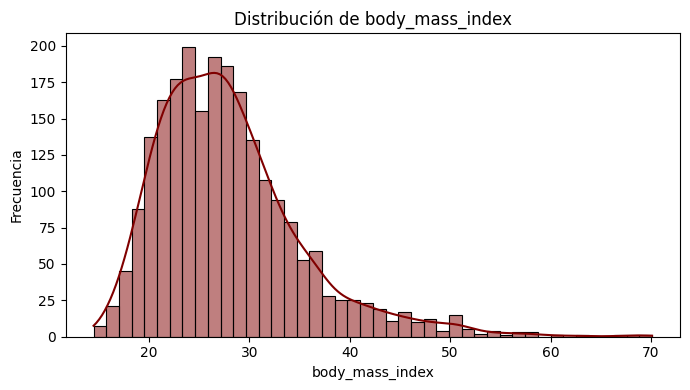


Asimetría de body_mass_index: 1.33

Curtosis de body_mass_index:  2.90
-> Curtosis alta (leptokúrtica): colas pesadas, mayor riesgo de outliers.

Shapiro–Wilk: p-value=1.7667434853444994e-33
  -> Shapiro–Wilk: se rechaza normalidad (p ≤ 0.05).
Anderson–Darling: Estadístico=38.70784701861294
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
Cramér–von Mises: Estadístico=759.3333333333333, p-value=2.0324645300107136e-07
  -> Cramér–von Mises: se rechaza normalidad (p ≤ 0.05).

------------------------------------------------------------



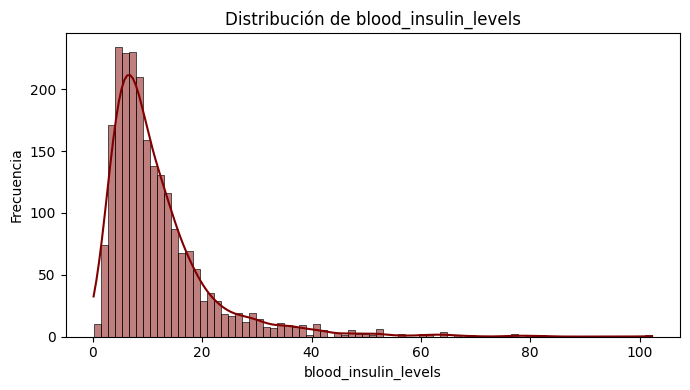


Asimetría de blood_insulin_levels: 2.78

Curtosis de blood_insulin_levels:  12.15
-> Curtosis alta (leptokúrtica): colas pesadas, mayor riesgo de outliers.

Shapiro–Wilk: p-value=7.1217081433494495e-50
  -> Shapiro–Wilk: se rechaza normalidad (p ≤ 0.05).
Anderson–Darling: Estadístico=130.20974070579996
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
Cramér–von Mises: Estadístico=753.8429310175903, p-value=1.8581692673436123e-07
  -> Cramér–von Mises: se rechaza normalidad (p ≤ 0.05).

------------------------------------------------------------



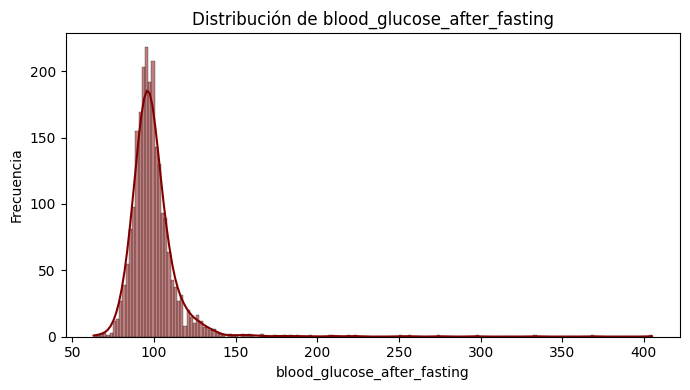


Asimetría de blood_glucose_after_fasting: 7.19

Curtosis de blood_glucose_after_fasting:  90.32
-> Curtosis alta (leptokúrtica): colas pesadas, mayor riesgo de outliers.

Shapiro–Wilk: p-value=7.025553497152108e-59
  -> Shapiro–Wilk: se rechaza normalidad (p ≤ 0.05).
Anderson–Darling: Estadístico=146.51812840555885
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
Cramér–von Mises: Estadístico=759.3333333333333, p-value=2.0324645300107136e-07
  -> Cramér–von Mises: se rechaza normalidad (p ≤ 0.05).

------------------------------------------------------------



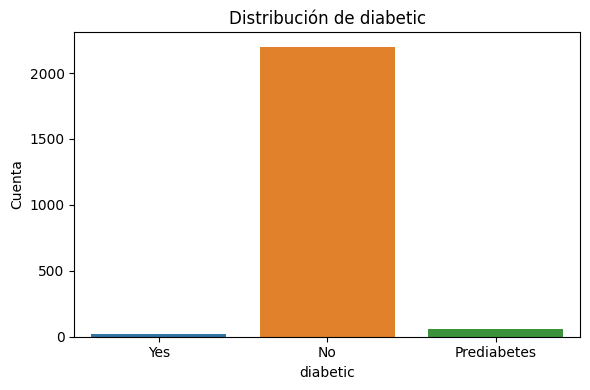


Frecuencias de la variable objetivo diabetic:
diabetic
No             2199
Prediabetes      58
Yes              21
Name: count, dtype: int64

Porcentajes de la variable objetivo diabetic:
diabetic
No             96.53
Prediabetes     2.55
Yes             0.92
Name: proportion, dtype: float64%

------------------------------------------------------------


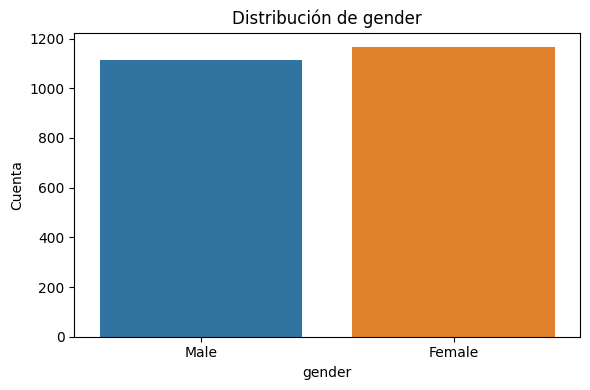


Frecuencias de gender:
gender
Female    1165
Male      1113
Name: count, dtype: int64

Porcentajes de gender:
gender
Female    51.14
Male      48.86
Name: proportion, dtype: float64%

------------------------------------------------------------


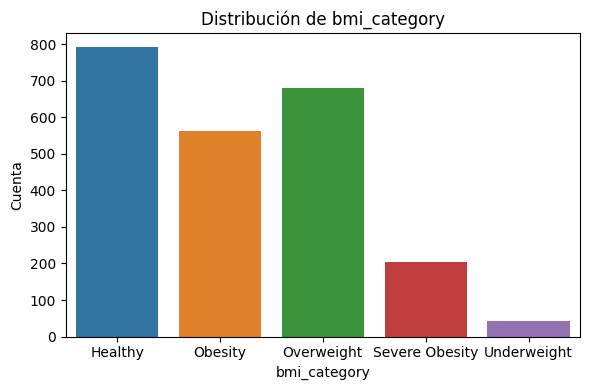


Frecuencias de bmi_category:
bmi_category
Healthy           791
Overweight        679
Obesity           563
Severe Obesity    203
Underweight        42
Name: count, dtype: int64

Porcentajes de bmi_category:
bmi_category
Healthy           34.72
Overweight        29.81
Obesity           24.71
Severe Obesity     8.91
Underweight        1.84
Name: proportion, dtype: float64%

------------------------------------------------------------
Crosstab: Género vs Estado diabético
diabetic   Yes    No  Prediabetes
gender                           
Male      0.01  0.96         0.03
Female    0.01  0.97         0.02

Crosstab: Grupo etario vs Estado diabético
diabetic    Yes    No  Prediabetes
age_group                         
Adult      0.01  0.97         0.02
Senior     0.02  0.93         0.05
Children   0.00  0.99         0.01
------------------------------------------------------------


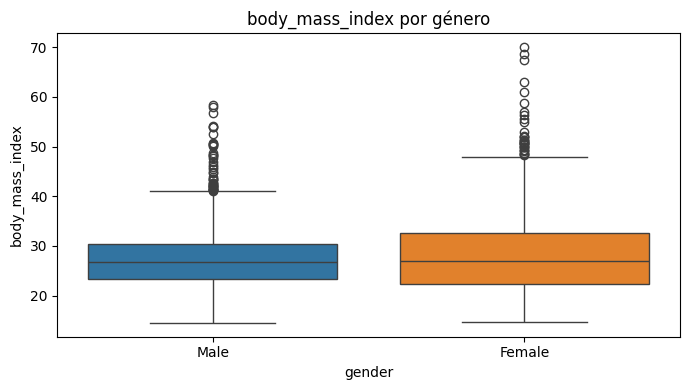

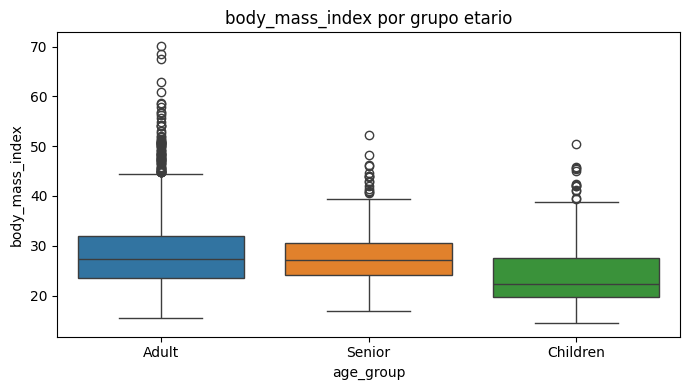

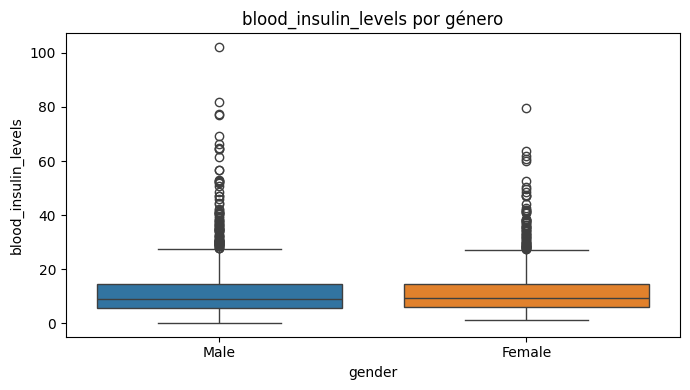

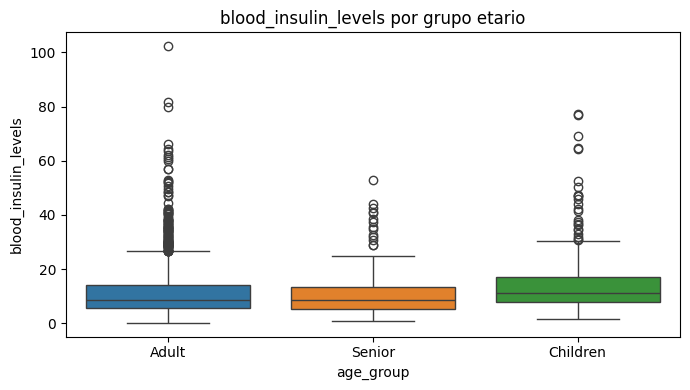

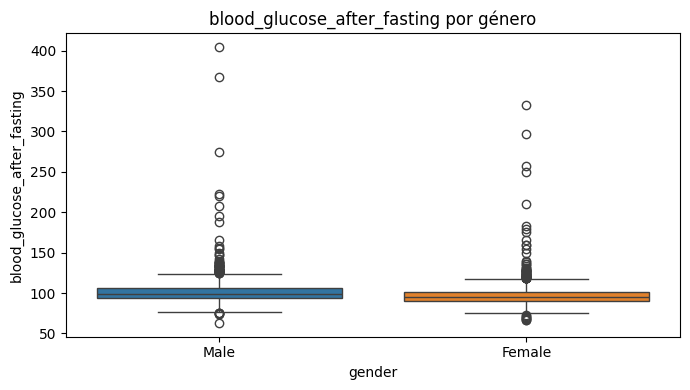

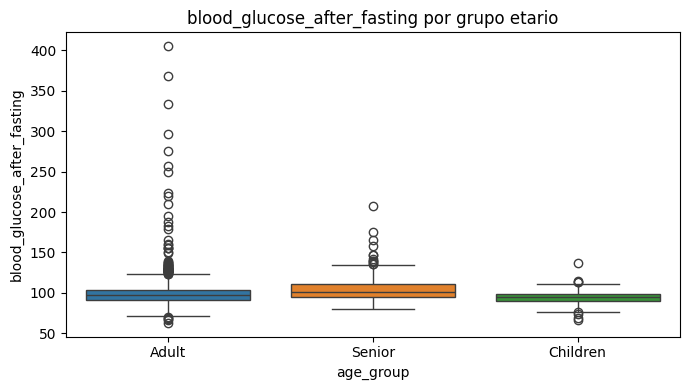

In [7]:
# Creamos una copia del dataframe
df = df_final.copy()

# Definición de variables
vars_cont = [
    'body_mass_index',
    'blood_insulin_levels',
    'blood_glucose_after_fasting'
]
vars_cat = ['diabetic', 'gender', 'bmi_category']

print("\nEstadísticas descriptivas:\n")
print(df[vars_cont].describe().to_string())

print("\nModa variables numéricas:\n")
print(df[vars_cont].mode().iloc[0])

print("\nModa variables categóricas:\n")
print(df[vars_cat].mode().iloc[0])


print("-"*60)
# Histogramas, asimetría y curtosis
for var in vars_cont:
  plt.figure(figsize=(7,4))
  sns.histplot(df[var].dropna(), kde=True, edgecolor='black', color='maroon')
  plt.title(f'Distribución de {var}')
  plt.xlabel(var)
  plt.ylabel('Frecuencia')
  plt.tight_layout()
  plt.show()

  skewness = df[var].skew()
  curtosis = df[var].kurtosis()
  print(f"\nAsimetría de {var}: {skewness:.2f}")
  print(f"\nCurtosis de {var}:  {curtosis:.2f}")

  # Evaluar la curtosis y dar recomendaciones
  if curtosis < -1:
    print("-> Curtosis baja (platykúrtica): colas ligeras, menos propensa a outliers extremos.")
  elif curtosis <= 1:
    print("-> Curtosis cercana a la normal (mesokúrtica): distribución similar a la normal.")
  else:
    print("-> Curtosis alta (leptokúrtica): colas pesadas, mayor riesgo de outliers.")

  prueba_normalidad(df, var)

# Frecuencias y porcentajes de variables categóricas
for var in vars_cat:
  plt.figure(figsize=(6,4))
  sns.countplot(x=var, data=df, hue=var)
  plt.title(f'Distribución de {var}')
  plt.xlabel(var)
  plt.ylabel('Cuenta')
  plt.tight_layout()
  plt.show()

  freq = df[var].value_counts()
  pct  = df[var].value_counts(normalize=True) * 100
  if (var == 'diabetic'):
    print(f"\nFrecuencias de la variable objetivo {var}:\n{freq}")
    print(f"\nPorcentajes de la variable objetivo {var}:\n{pct.round(2)}%\n")
  else:
    print(f"\nFrecuencias de {var}:\n{freq}")
    print(f"\nPorcentajes de {var}:\n{pct.round(2)}%\n")
  print("-"*60)

# Tablas cruzadas para género y grupo etario
print("Crosstab: Género vs Estado diabético")
print(pd.crosstab(df['gender'], df['diabetic'], normalize='index').round(2))
print("\nCrosstab: Grupo etario vs Estado diabético")
print(pd.crosstab(df['age_group'], df['diabetic'], normalize='index').round(2))
print("-"*60)

# Boxplots por género y grupo etario
for var in vars_cont:
  plt.figure(figsize=(7,4))
  sns.boxplot(x='gender', y=var, data=df, hue='gender')
  plt.title(f'{var} por género')
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(7,4))
  sns.boxplot(x='age_group', y=var, data=df, hue='age_group')
  plt.title(f'{var} por grupo etario')
  plt.tight_layout()
  plt.show()


# **5. Análisis Exploratorio de los Datos**


## - Preguntas a responder
- ¿Cómo se combinan el BMI, la glucosa e insulina?
  - Buscamos ver si al unir estas 3 variables aparecen grupos o patrones naturales.
- ¿Qué efecto tienen los extremos?
  - Comparamos la forma de las distribuciones con y sin outliers para entender su efecto.
- ¿Los patrones de los datos difieren según los subgrupos?
  - Ver si hombres/mujeres o niños/adultos/mayores muestran relaciones distintas entre las variables.

## - Estadísticas Empleadas, visualización y Resumen de las respuestas encontradas.
- **Estadísticas empleadas**
  - **Correlaciones** (Pearson y Spearman) para medir fuerza y sentido de las relaciones.
  - **Comparación de grupos** (ANOVA o Kruskal-Wallis) para ver si los niveles de glucosa, por ejemplo, son diferentes según el estado diabético.
  - **Medias y rangos intercuartílicos por grupo** con `groupby()` para cuantificar estas diferencias.
- **Visualizaciones**
  1. Pairplots coloreados por diabetic, para detectar junturas o separaciones de grupos.
  2. Scatter plots (por ejemplo BMI vs glucosa, BMI vs insulina) con hue='diabetic'.
  3. Heatmap de la matriz de correlaciones (Pearson y Spearman) para ver rápidamente pares muy o poco asociados.
  4. Violin/boxplots, segmentados por diabetic, gender o age_group, para comparar las formas y rangos.
  5. Comparación “con” vs. “sin” outliers con histogramas.
- **Resumen de las respuestas encontradas**
  - Se descubrió con el EDA que el peso, glucosa e insulina varían de forma distinta segú el estado diabético, mientras que el género y grupo etario aportan poca o casi nada de variación.
  - Hay correlación moderada (aprox. 0.54) entre BMI e insulina, como se puede observar en los gráficos. Mientras suba el BMI puede subir la insulina. En cambio la glucos tiene muy baja correlación con BMI e insulina (aprox. 0.28 y 0.33).
  - AL eliminar los valores atípicos, la forma general de la distribución apenas cambia pero la simetría mejora y los rangos se acotan, aunque tienen un muy ligero sesgo aún.
  - La agrupacion del estado en los datos es el siguiente:
    - Sanos (No): El BMI, glucosa e insulina son bajos y agrupados.
    - Prediabetes: La agrupación es intermedia.
    - Diabetes (Yes): Los valores son más altos y dispersos.
    
    Estos valores se pueden comprobar mediante los violin plots y numéricamente con Kruskal-Wallis.

  - La distribución entre géneros no muestra mucha diferencia por estados diabéticos. En cambio por grupo etario sí se muestra más diferencia en la distribución en glucos e insulina en los adultos.

  Con esto concluímos que el diagnóstico (No/Yes/Prediabetes) es el que más explica las diferencias entre BMI, glucosa e insulina en los datos.

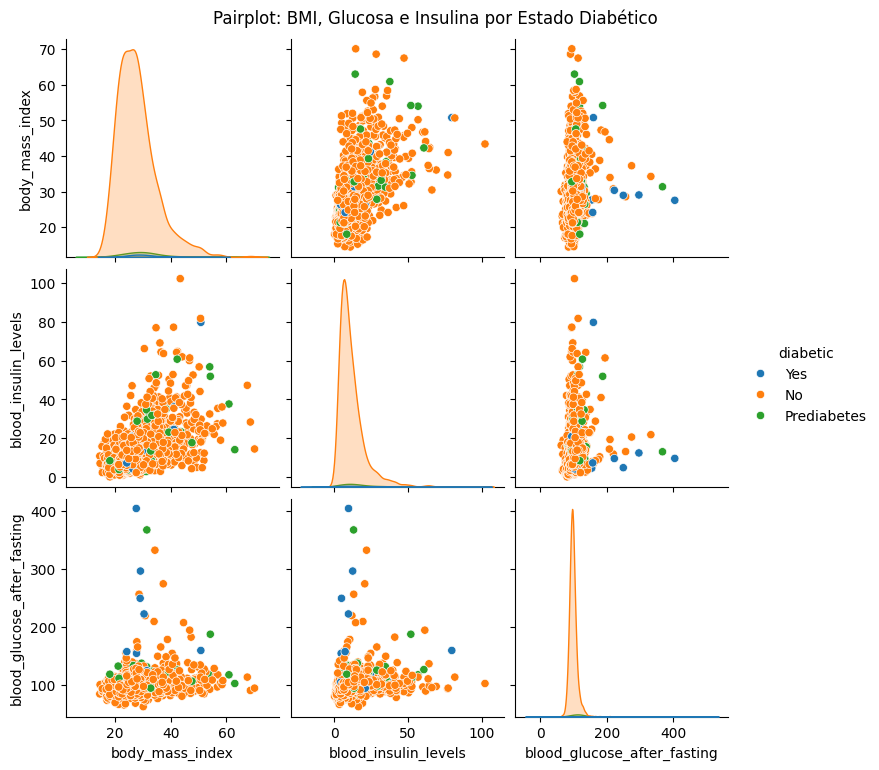

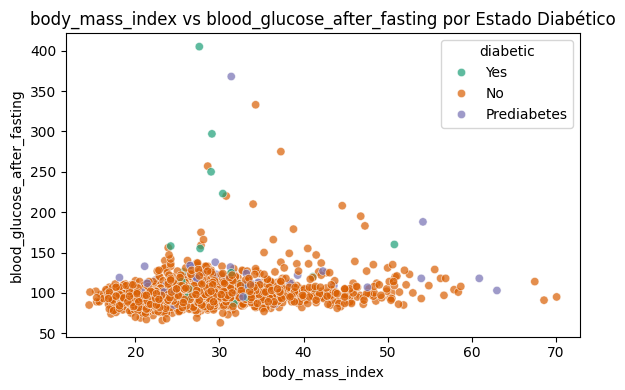

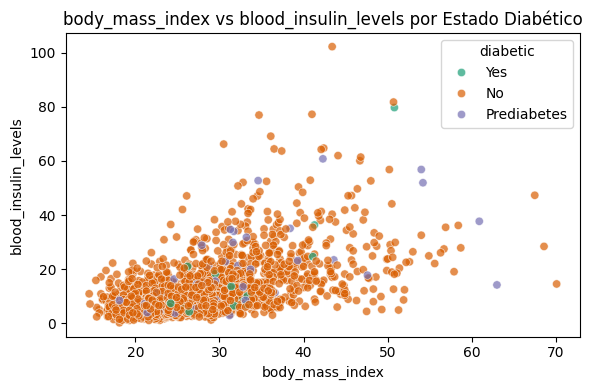

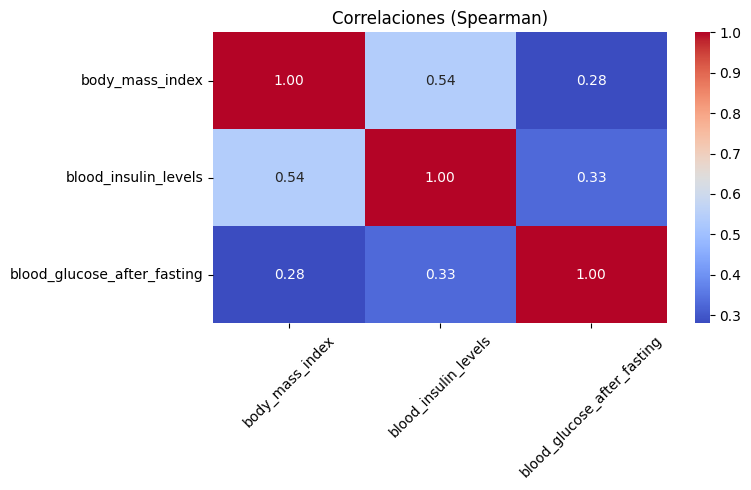

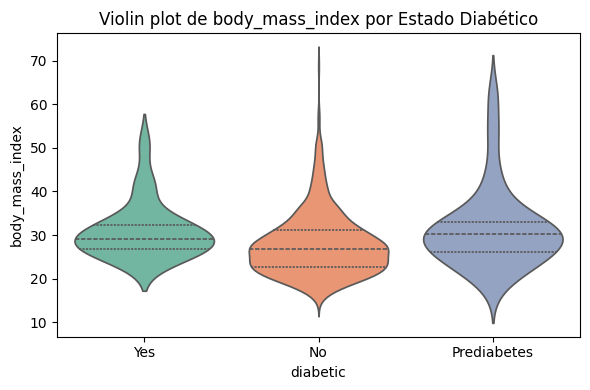

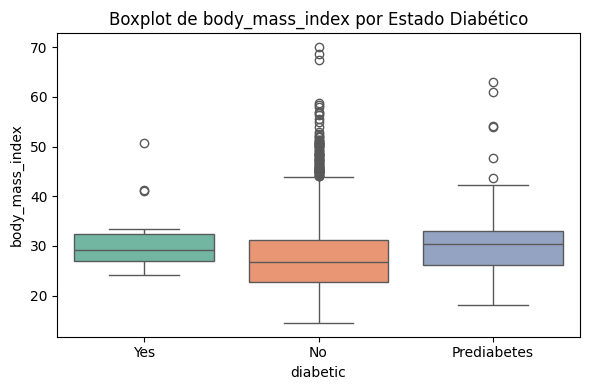

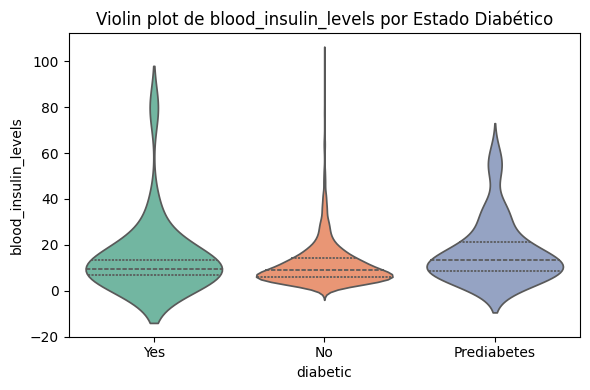

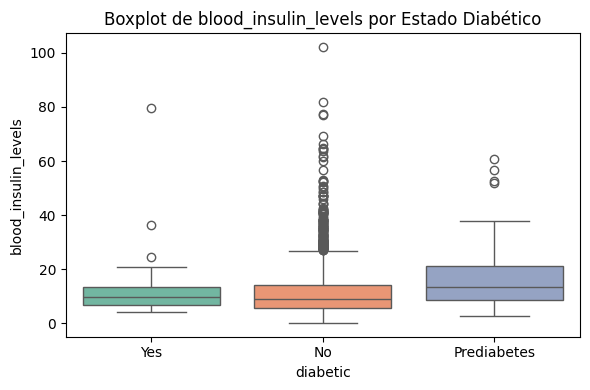

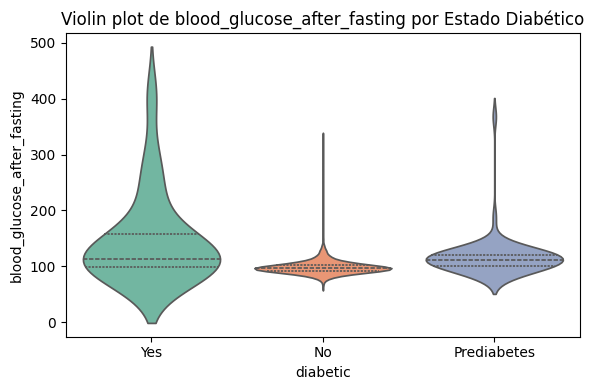

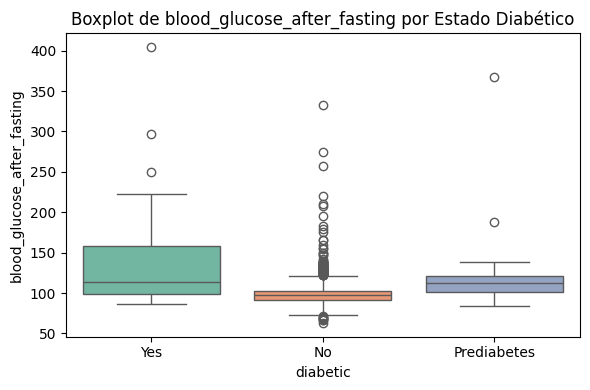

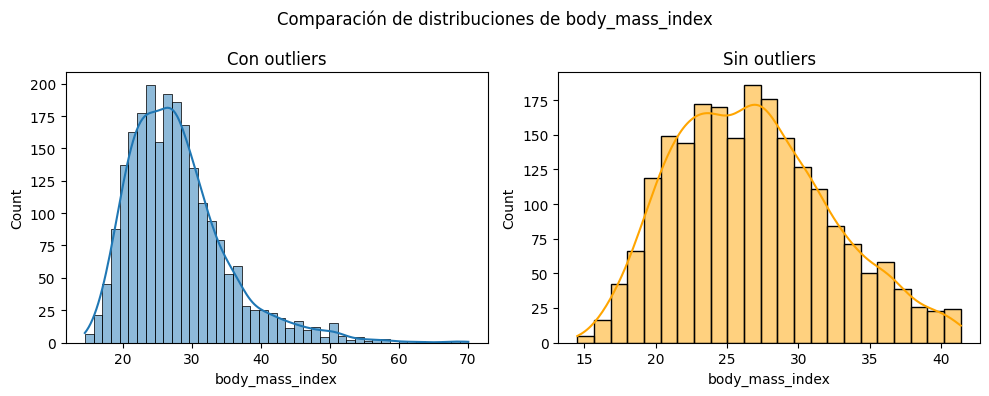

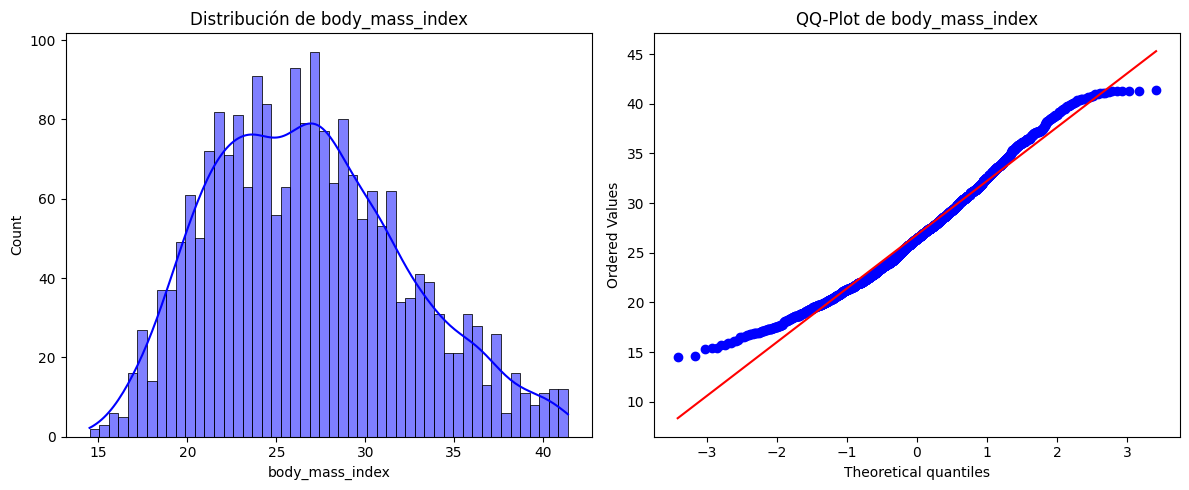


Kruskal–Wallis (BMI): H=18.96, p=7.630107340850794e-05

  → Cambia de forma significativa según el estado diabético.



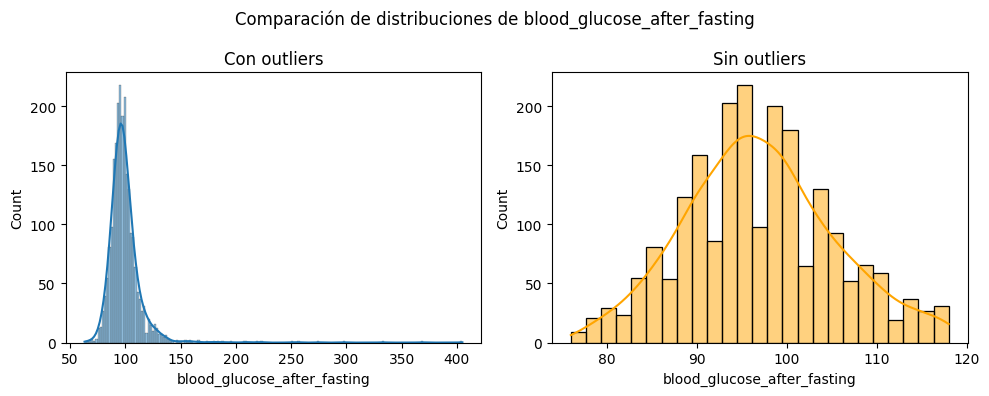

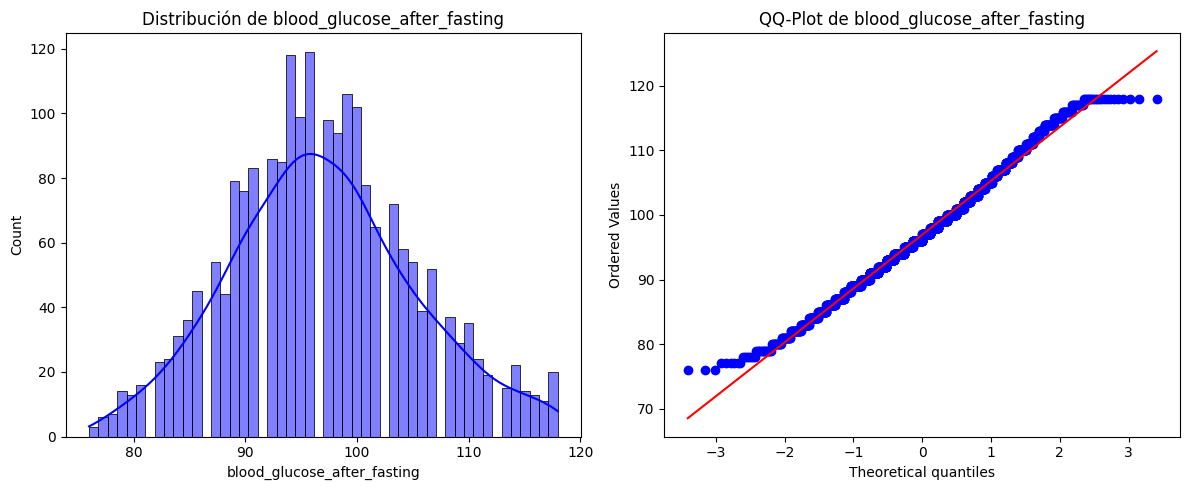


Kruskal–Wallis (BMI): H=71.57, p=2.880724124110177e-16

  → Cambia de forma significativa según el estado diabético.



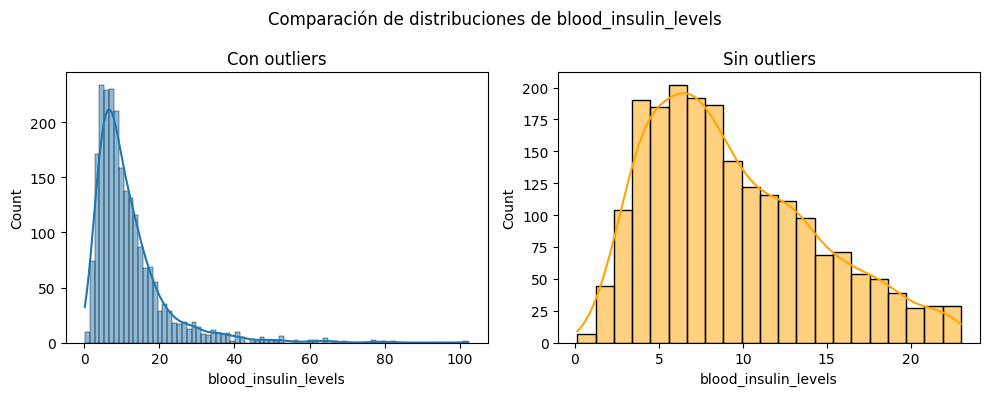

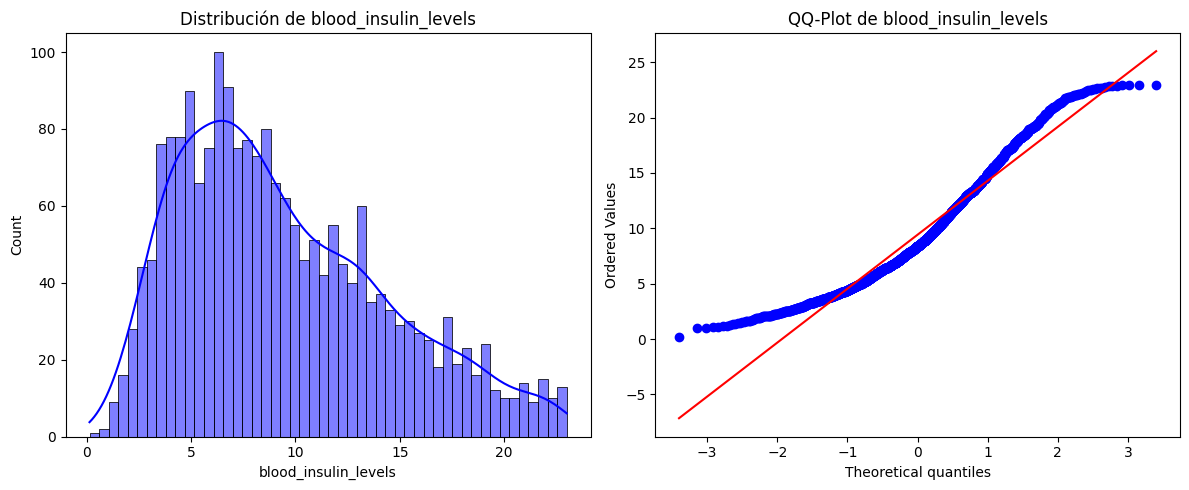


Kruskal–Wallis (BMI): H=12.98, p=0.0015221457966888127

  → Cambia de forma significativa según el estado diabético.



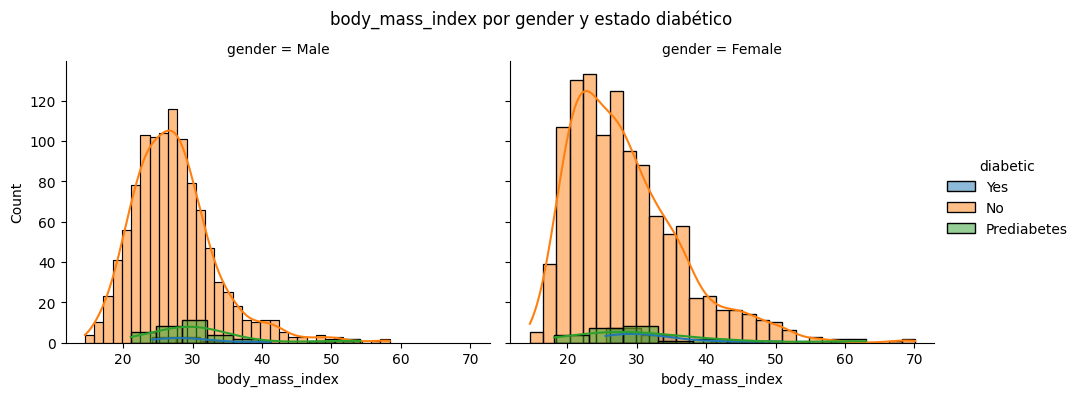

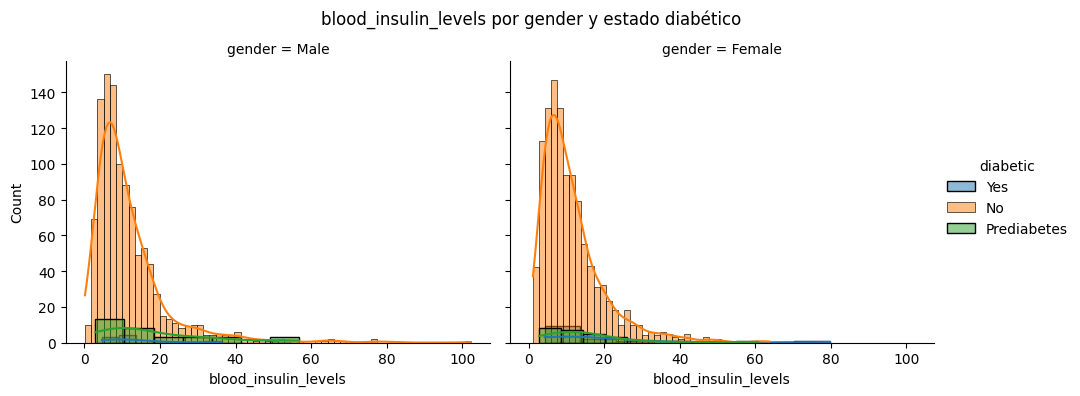

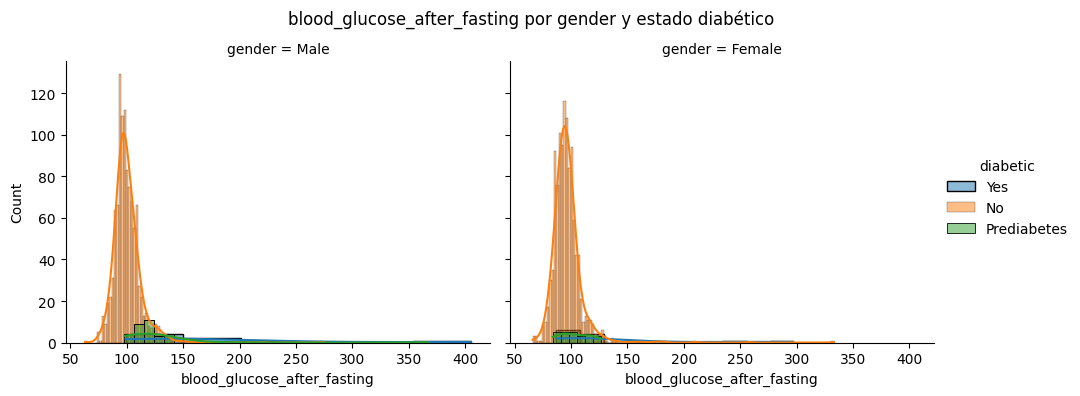

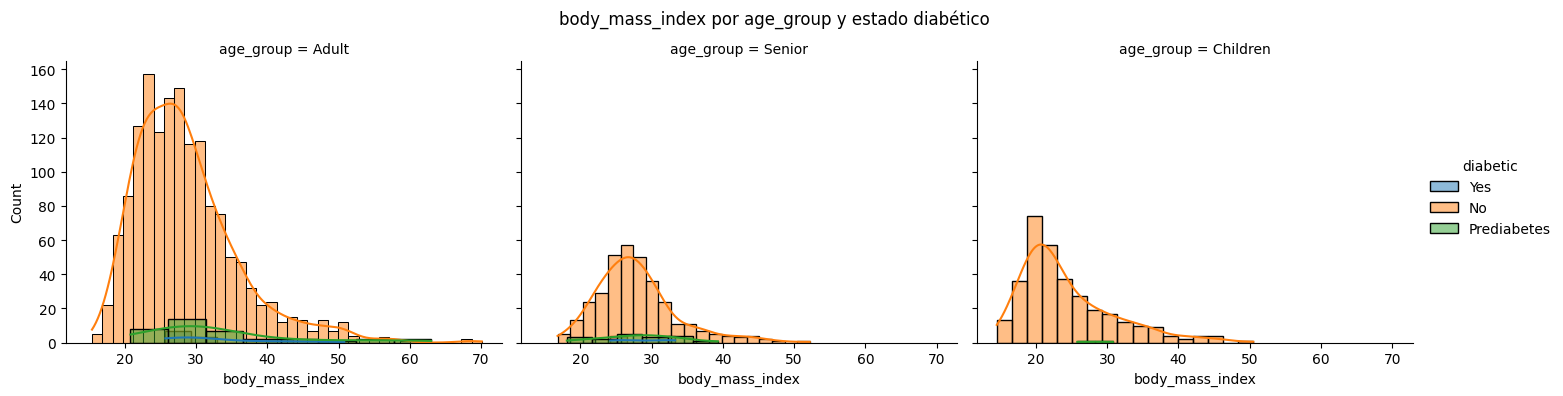

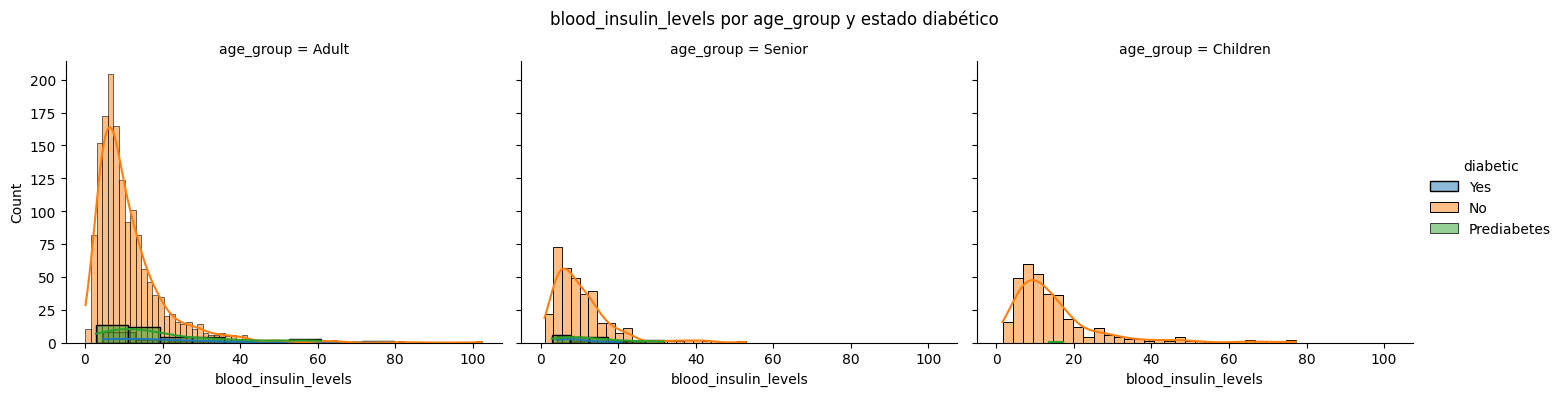

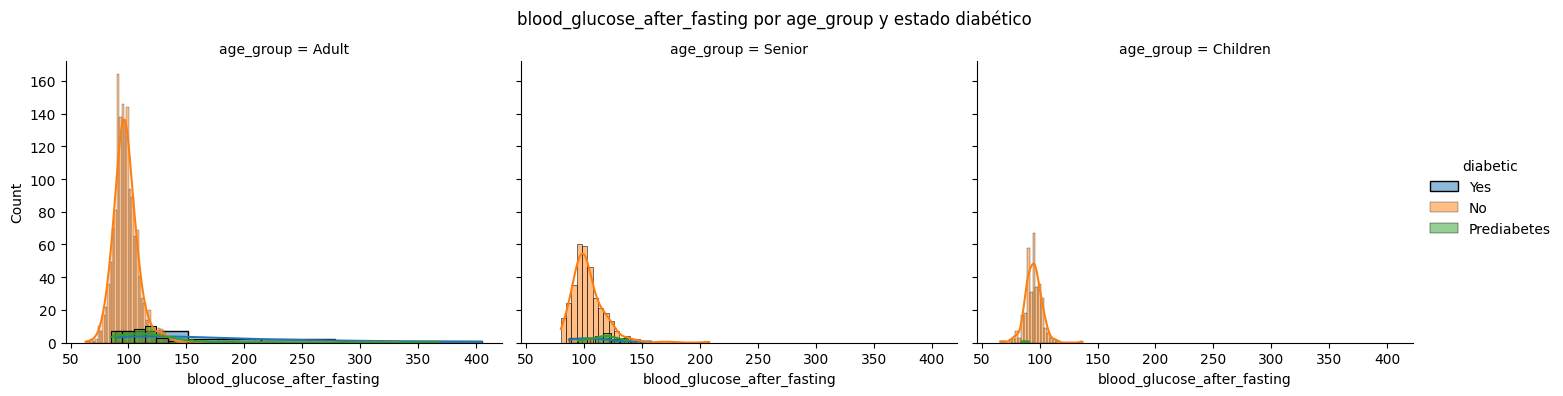

In [8]:
#  Pairplot
sns.pairplot(df, vars=vars_cont, hue='diabetic', diag_kind='kde')
plt.suptitle('Pairplot: BMI, Glucosa e Insulina por Estado Diabético', y=1.02)
plt.show()

# Scatter plots bivariantes (una vs otra)
for x,y in [('body_mass_index','blood_glucose_after_fasting'),
            ('body_mass_index','blood_insulin_levels')]:
  plt.figure(figsize=(6,4))
  sns.scatterplot(x=x, y=y, hue='diabetic', data=df,
                  palette='Dark2', alpha=0.7)
  plt.title(f'{x} vs {y} por Estado Diabético')
  plt.tight_layout()
  plt.show()

# Heatmap de correlación (Spearman) - los datos no son normales
corr = df[vars_cont].corr(method='spearman').round(2)
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaciones (Spearman)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin + Boxplots por estado diabético
for v in vars_cont:
  plt.figure(figsize=(6,4))
  sns.violinplot(x='diabetic', y=v, data=df, inner='quartile', palette='Set2', hue='diabetic')
  plt.title(f'Violin plot de {v} por Estado Diabético')
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(6,4))
  sns.boxplot(x='diabetic', y=v, data=df, palette='Set2', hue='diabetic')
  plt.title(f'Boxplot de {v} por Estado Diabético')
  plt.tight_layout()
  plt.show()

# Efecto de outliers (para BMI)
# Se utiliza la función que se definió en la sección 3
remove_outliers_mad(df, 'body_mass_index')

# Efecto de outliers (para glucosa)
remove_outliers_mad(df, 'blood_glucose_after_fasting')

# Efecto de outliers (para insulina)
remove_outliers_mad(df, 'blood_insulin_levels')

# Facetgrid para grupo etario y género
for col in ['gender','age_group']:
  for v in vars_cont:
    g = sns.FacetGrid(df, col=col, hue='diabetic', height=4, aspect=1.2)
    g.map(sns.histplot, v, kde=True).add_legend()
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'{v} por {col} y estado diabético')
    plt.show()

# **6. Análisis Predictivo**


## - Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código
  - **Problemas a resolver**
    - **Desbalance de clases:** En el dataset original, aprox. 3.5% de los casos son positivos ("Yes" y "Prediabetes") y 96.5% negativos ("No). Esto está generando un sesgo que afecta el aprendizaje del modelo y lo lleva a predecir mayormente "No".
    - **Outliers:** Existen valores atípicos en los niveles de glucosa e insulina, lo que también afecta el aprendizaje del modelo. Se utilizó la winsorización de 1% para recortar los valores de las variables numéricas.
    - **Diferentes escalas:** BMI, glucosa e insulina tienen diferentes unidades de medida, BMI es kilogramos por metro cuadrado, Glucosa es miligramos por decilitro e Insulina es micro unidades internacionales por mililitro, lo que requiere que haya normalización.
    - **Sesgo en las distribuciones:** Las variables numéricas tienen asimetría en la distribución, por lo que se aplicó la transformación Yeo-Johnson, ya que no necesita una distribución normal.
    - La variable categórica `gender` se cambió a variable numérica con One-Hot-Encoding y la variable `diabetic` se mapeo a numérico base `0` (No → 0, Yes → 1 y Prediabetes → 1).
    - **Técnicas de Oversampling/Undersampling:** Se emplearon diferentes métodos de oversampling (y una combinación de oversampling/undersampling) para detectar cuál es el mejor.

## - Modelado Predictivo
### - Modelo elegido y parámetros
  - **Modelo Elegido**
    - Classificador: `RandomForestClassifier`
    - Hiperparámetros: `n_estimators = 200`, `max_depth = 5` y `class_weight = {0:1, 1:10}`
  - **Técnicas de Oversampling (y combinación)**
    - SMOTE
    - BorderlineSMOTE
    - ADASYN
    - SVMSMOTE
    - KMeansSMOTE
    - SMOTETomek

### - Entrenamiento y Evaluación
Se realizó el entrenamiento y la evaluación del desempeño con cada técnica utilizando un porcentaje de 30% y 70% para obtener las siguientes métricas:
  - **Recall (Yes):** La capacidad de detectar correctamente los casos positivos.
  - **F1-score (Yes):** El balance entre la precisión y recall en la clase `Yes`.
  - **Balanced Accuracy:** El promedio de recall por clase. Este compensa el desbalance de las clases.
  - **ROC AUC:** La capacidad del modelo para distinguir entre clases.

## - Resultados

Los resultados son los siguientes:
  - Resultados por método:
  
Método|Accuracy (train)|Accuracy (test)|Balanced Accuracy|ROC AUC|Recall (Yes)|F1-score (Yes)
------|----------------|---------------|-----------------|-------|------------|--------------
<center>SMOTE</center>|<center>0.646801</center>|<center>0.619883</center>|<center>0.662500</center>|<center>0.728535</center>|<center>0.708333</center>|<center>0.115646</center>
<center>BorderlineSMOTE</center>|<center>0.840025</center>|<center>0.821637</center>|<center>0.706818</center>|<center>0.775000</center>|<center>0.583333</center>|<center>0.186667</center>
<center>ADASYN</center>|<center>0.617315</center>|<center>0.578947</center>|<center>0.681439</center>|<center>0.737689</center>|<center>0.791667</center>|<center>0.116564</center>
<center>SVMSMOTE</center>|<center>0.878294</center>|<center>0.847953</center>|<center>0.700379</center>|<center>0.774747</center>|<center>0.541667</center>|<center>0.200000</center>
<center>KMeansSMOTE</center>|<center>0.563990</center>|<center>0.546784</center>|<center>0.684848</center>|<center>0.743119</center>|<center>0.833333</center>|<center>0.114286</center>
<center>SMOTETomek</center>|<center>0.656838</center>|<center>0.631579</center>|<center>0.688636</center>|<center>0.738384</center>|<center>0.750000</center>|<center>0.125000</center>

  - `KMeansSMOTE` tiene el mayor recall (Yes) de todos los métodos con 0.833333. Esto quiere decir que es el más sensible para detectar los positivos.
  - `SVMSMOTE` tiene el mejor resultado en F1-score (Yes) con 0.200000, lo que significa que tiene el mejor balance entre precisión y recall.
  - Para el mejor resultado de Balance Accuracy y ROC AUC es `BorderlineSMOTE` con `SVMSMOTE` siendo el segundo con resultados muy cerca de los de `BorderlineSMOTE`.


 Podemos concluir que si el objetivo principal es el detectar todos los valores positivos que se puede, `KMeansSMOTE` es el método más adecuado a utilizar en ese caso. En cambio, si se quiere tener el mejor balance entre el recall y accuracy, es decir un mejor rendimiento global, `SVMSMOTE` es el indicado, con `BorderlineSMOTE` como un método alternativo.




X: (2278, 4) y: (2278,)

Primeras filas de X:
    body_mass_index  blood_glucose_after_fasting  blood_insulin_levels  gender
0             18.0                           96                 10.80    Male
1             14.5                           85                 10.86    Male
2             21.4                           95                 15.56  Female
3             20.3                           98                 13.38  Female
4             15.7                           91                  5.01  Female

Distribución de clases en y:
 target
0    0.965
1    0.035
Name: proportion, dtype: float64
Tamaño Train : (2050, 4) {0: 0.965, 1: 0.035}
Tamaño Test  : (228, 4) {0: 0.965, 1: 0.035}
--------------- Método SMOTE ---------------

Balanced Accuracy (test): 0.589
ROC AUC (test): 0.684

Reporte de clasificación (test):

              precision    recall  f1-score   support

          No      0.979     0.427     0.595       220
         Yes      0.045     0.750     0.086         8

  

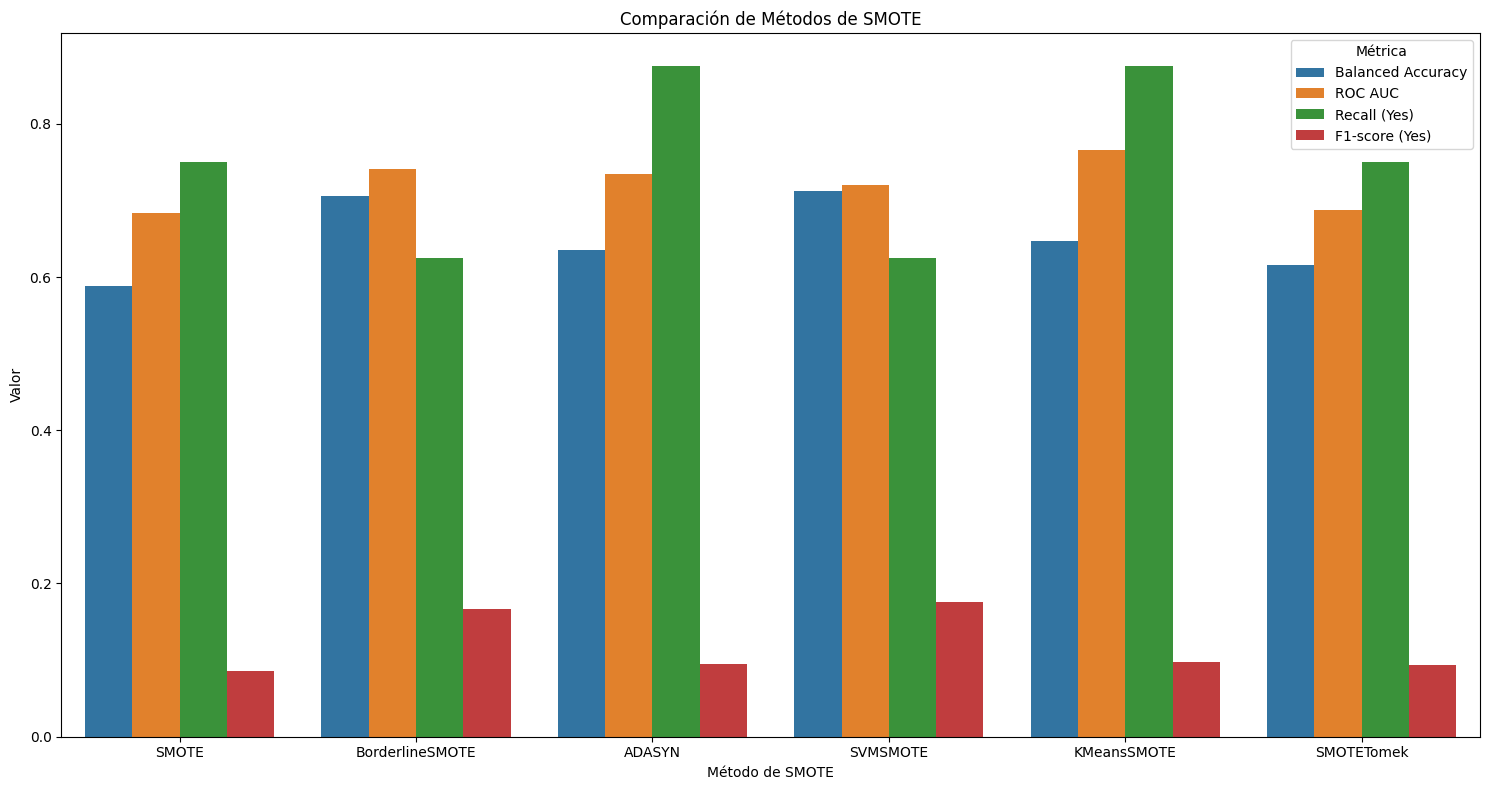

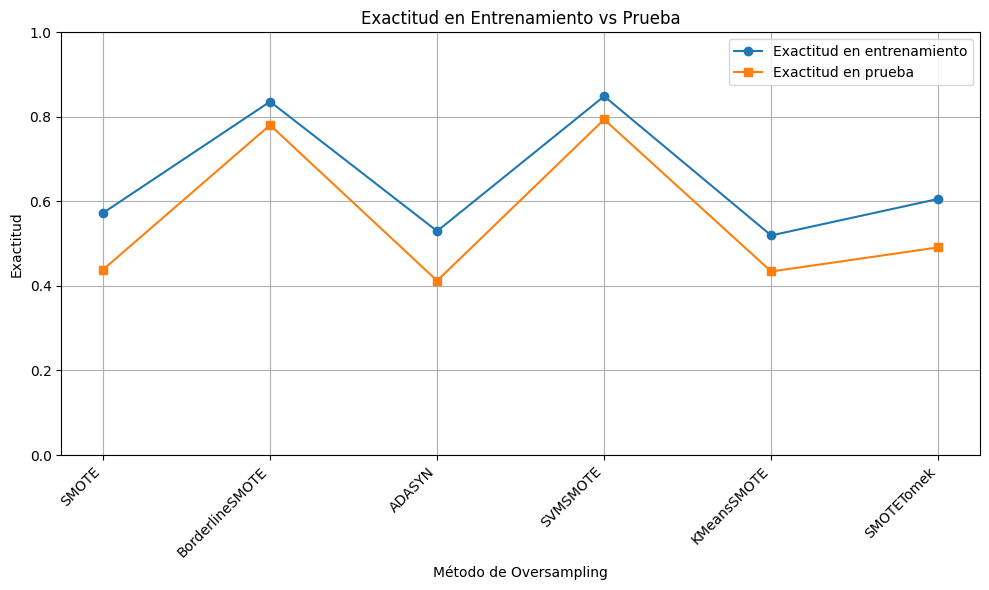

,Método,Accuracy (train),Accuracy (test),Balanced Accuracy,ROC AUC,Recall (Yes),F1-score (Yes)
0,SMOTE,0.572683,0.438596,0.588636,0.684091,0.750,0.085714
1,BorderlineSMOTE,0.836098,0.780702,0.705682,0.740909,0.625,0.166667
2,ADASYN,0.529756,0.412281,0.635227,0.734659,0.875,0.094595
3,SVMSMOTE,0.848780,0.793860,0.712500,0.719886,0.625,0.175439
4,KMeansSMOTE,0.519512,0.434211,0.646591,0.765341,0.875,0.097902
5,SMOTETomek,0.605854,0.491228,0.615909,0.687500,0.750,0.093750


In [11]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from scipy.stats.mstats import winsorize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SVMSMOTE, KMeansSMOTE
from imblearn.combine import SMOTETomek
from sklearn.cluster import KMeans
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score
)

# Original: 1=Yes, 2=No, 3=Prediabetes
mapping = {
    'No': 0, # No → 0
    'Prediabetes': 1, # Prediabetes → 1
    'Yes': 1 # Yes → 1
}

# Creamos la nueva columna target
df['target'] = df['diabetic'].map(mapping)

# Separar variable X y variable y
# Sacamos variables numericas y categóricas de predicción
num_vars = ['body_mass_index', 'blood_glucose_after_fasting', 'blood_insulin_levels']
cat_vars = ['gender']

X = df[ num_vars + cat_vars ]
y = df['target']

# Verificamos
print("X:", X.shape, "y:", y.shape)
print("\nPrimeras filas de X:\n", X.head())
print("\nDistribución de clases en y:\n", y.value_counts(normalize=True).round(3))

# Division en Train/Test - Estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

# Verificación
print("Tamaño Train :", X_train.shape, y_train.value_counts(normalize=True).round(3).to_dict())
print("Tamaño Test  :", X_test.shape,  y_test.value_counts(normalize=True).round(3).to_dict())

# Winsorizacion para recortar outliers
winsor_transformer = FunctionTransformer(lambda arr: np.apply_along_axis(lambda col: winsorize(col, limits=[0.01, 0.01]), 0, arr), validate=False)

# Transformadores
transformador_numerico = Pipeline([
    ('winsor', winsor_transformer),
    ('yeo', PowerTransformer(method='yeo-johnson')),
    ('scaler', RobustScaler())
])

transformador_categorico = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

# Preprocesador
preprocesador = ColumnTransformer([
    ('num', transformador_numerico, num_vars),
    ('cat', transformador_categorico, cat_vars)
])

metodos_smote = {
    'SMOTE': SMOTE(random_state=42, sampling_strategy=0.5),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42, sampling_strategy=0.5),
    'ADASYN': ADASYN(random_state=42, sampling_strategy=0.5),
    'SVMSMOTE': SVMSMOTE(random_state=42, sampling_strategy=0.5),
    'KMeansSMOTE': KMeansSMOTE(random_state=42,
                               sampling_strategy=0.8,
                               kmeans_estimator=KMeans(n_clusters=2),
                               cluster_balance_threshold=0.01),
    'SMOTETomek': SMOTETomek(random_state=42, sampling_strategy=0.5)
}

# Lista de resultados
resultados = []
mejor_pipeline = []

for nombre, smote in metodos_smote.items():
  # Pipeline
  pipe = imbPipeline([
      ('pre',  preprocesador),
      ('sm',   smote),
      ('clf',  RandomForestClassifier(
          class_weight={0:1, 1:10},
          n_estimators=200,
          max_depth=5,
          random_state=42))
  ])

  # Guardar el mejor modelo
  mejor_pipeline = pipe if nombre == 'SVMSMOTE' else mejor_pipeline

  pipe.fit(X_train, y_train)

  # Evaluación
  y_pred  = pipe.predict(X_test)
  y_proba = pipe.predict_proba(X_test)[:,1]

  y_train_pred = pipe.predict(X_train)

  # Accuracy
  acc_train = accuracy_score(y_train, y_train_pred)
  acc_test  = accuracy_score(y_test, y_pred)

  # Métricas finales

  bal_acc = balanced_accuracy_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_proba)

  reporte = classification_report(
      y_test, y_pred,
      target_names=['No','Yes'],
      output_dict=True
  )

  # Se extrae recall y F1 de "Yes"
  recall_yes = reporte['Yes']['recall']
  f1_yes = reporte['Yes']['f1-score']

  # Almacenar resultados
  resultados.append({
      'Método': nombre,
      'Accuracy (train)': acc_train,
      'Accuracy (test)': acc_test,
      'Balanced Accuracy': bal_acc,
      'ROC AUC': auc,
      'Recall (Yes)': recall_yes,
      'F1-score (Yes)': f1_yes
  })

  print(f'-'*15,f'Método {nombre}','-'*15)
  print(f"\nBalanced Accuracy (test): {bal_acc:.3f}")
  print(f"ROC AUC (test): {auc:.3f}\n")

  print("Reporte de clasificación (test):\n")
  print(classification_report(
      y_test, y_pred,
      target_names=['No','Yes'],
      digits=3
  ))

  print("Matriz de confusión (test):")
  print(confusion_matrix(y_test, y_pred))
  print("-"*45)

# Dataframe para gráfico para Yes
df_resultados = pd.DataFrame(resultados)

# Dataframe formato largo
df_resultados_largo = pd.melt(df_resultados, id_vars='Método',
                              value_vars=['Balanced Accuracy', 'ROC AUC', 'Recall (Yes)', 'F1-score (Yes)'],
                              var_name='Métrica', value_name='Valor')

plt.figure(figsize=(15,8))
sns.barplot(data=df_resultados_largo, x='Método', y='Valor', hue='Métrica')
plt.title('Comparación de Métodos de SMOTE')
plt.xlabel('Método de SMOTE')
plt.ylabel('Valor')
plt.tight_layout()
plt.legend(title='Métrica')
plt.show()

# Gráfica Accuracy
plt.figure(figsize=(10,6))
x = range(len(df_resultados))
metodos = [row['Método'] for index, row in df_resultados.iterrows()]
train_acc = [row['Accuracy (train)'] for index, row in df_resultados.iterrows()]
test_acc = [row['Accuracy (test)'] for index, row in df_resultados.iterrows()]

plt.plot(x, train_acc, marker='o', label='Exactitud en entrenamiento')
plt.plot(x, test_acc, marker='s', label='Exactitud en prueba')

plt.ylim(0, 1)
plt.xlabel('Método de Oversampling')
plt.ylabel('Exactitud')
plt.title('Exactitud en Entrenamiento vs Prueba')
plt.xticks(x, metodos, rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

df_resultados




 body_mass_index  blood_glucose_after_fasting  blood_insulin_levels gender  prediccion  probabilidad_yes  etiqueta_estimada  coincide
            18.0                           80                  10.0   Male           0          0.012347                  0      True
            22.5                           95                  12.5 Female           0          0.020419                  0      True
            27.0                          105                  15.0   Male           0          0.165661                  1     False
            30.5                          110                  20.0 Female           1          0.701021                  1      True
            35.0                          125                  24.0   Male           1          0.948512                  1      True
            40.0                          130                  30.0 Female           1          0.905498                  1      True
            25.0                          100                 

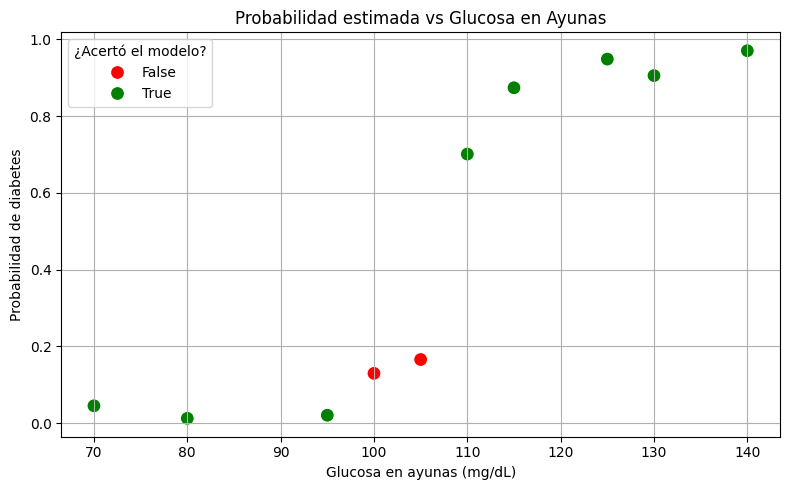

In [25]:
pacientes = pd.DataFrame({
    'body_mass_index': [18.0, 22.5, 27.0, 30.5, 35.0, 40.0, 25.0, 29.0, 24.0, 32.0],
    'blood_glucose_after_fasting': [80, 95, 105, 110, 125, 130, 100, 115, 70, 140],
    'blood_insulin_levels': [10.0, 12.5, 15.0, 20.0, 24.0, 30.0, 18.5, 22.0, 13.0, 35.0],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male']
})

# Predicciones
pacientes['prediccion'] = mejor_pipeline.predict(pacientes)
pacientes['probabilidad_yes'] = mejor_pipeline.predict_proba(pacientes)[:,1]

def regla_simple(fila):
    if fila['blood_glucose_after_fasting'] >= 126:
        return 1  # diabetes probable
    elif fila['blood_glucose_after_fasting'] >= 100:
        return 1  # prediabetes
    else:
        return 0  # normal

pacientes['etiqueta_estimada'] = pacientes.apply(regla_simple, axis=1)
pacientes['coincide'] = pacientes['prediccion'] == pacientes['etiqueta_estimada']


print(pacientes.to_string(index=False))

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=pacientes,
    x='blood_glucose_after_fasting',
    y='probabilidad_yes',
    hue='coincide',
    palette={True: 'green', False: 'red'},
    s=100
)
plt.title('Probabilidad estimada vs Glucosa en Ayunas')
plt.xlabel('Glucosa en ayunas (mg/dL)')
plt.ylabel('Probabilidad de diabetes')
plt.legend(title='¿Acertó el modelo?')
plt.grid(True)
plt.tight_layout()
plt.show()


# **7. Conclusiones y Trabajos Futuros**


## - Resumen del trabajo realizado, hallazgos y posibles mejoras

Se construyó un modelo de predicción para identificar los casos de diabetes o prediabetes utilizando las variables de salud básicas (IBM, Glucosa e Insulina). Se encontraron varios problemas en el procesamiento: outlies, distribuciones sesgadas, difenrentes escalas y un fuerte desbalance de clases con solo aproximadamente 3.5% de valores positivos. Para poder tratar este debalance se utilizaron varios métodos de oversampling de SMOTE. Al final los métodos `BorderlineSMOTE` y `SVMSMOTE` ofrecieron el mejor equilibrio entre recall, F1-score y exactitud, mientras que `KMeansSMOTE` destaca por su resultado alto de detectar casos positivos (recall).

El modelo utilizado fue **Random Forest**, con hiperparámetros fijos. La razon de utlizar este modelo es porque es me permitió ajustar el peso de las clases para darle importancia a las clase minoritaria(positivos) y que pueda detectar mejor estos casos. No se ve tan afectado por outliers en los datos. Tiene buen rendimiento en general, alta estabilidad gracias al uso de árboles de decisión, buena capacidad de selección automática de características y el fácil ajuste y optimización del modelo.

### Principales Hallazgos

- La forma en que se agregan los datos sintéticos afecta bastante si el modelo detecta bien los casos de diabetes.
- El preprocesamiento(winsorización, RobustScaler y Yeo-Johnson) realizado fue importante para que el modelo funcione bien.
- El mejor resultado global fue `SVMSMOTE` ya que tiene un buen equilibrio entre detección y precisión.

### Trabajos futuros
- Realizar un ajuste de hiperparámetros más detallado, como ejemplo ajustar `max_features`, `min_smples_leaf` para mejorar el rendimiento del modelo.
- Evaluar los datos con otros modelos, como `XGBoost`, `SVM` o `LightGBM` que tal vez funcionen mejor.
  ```
  https://xgboost.readthedocs.io/en/release_3.0.0/
  https://scikit-learn.org/stable/modules/svm.html
  https://lightgbm.readthedocs.io/en/stable/index.html
  ```
- Agregar más variables de salud para mejorar el modelo
- Aplicar más técnicas como feature importance(disminución media de impurezas, permutación de características) y/o SHAP(SHapley Additive exPlanations) un enfoque de teoría de juegos para poder explicar el resultado de cualquier modelo de aprendizaje.
  ```
  https://shap.readthedocs.io/en/latest/
  https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
  ```